In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# Classifying hand-written digits

### Loading the MNIST data set

In this document, we will use both our own neural network algorithm, and Tensorflow library. To make it easier for people using Google Colab to follow, we will load the data set from the TensorFlow library that comes preinstalled with colab. Users loading these notebooks in their own environments will have to install Tensorflow anyways.

First we import the TensorFlow library as `tf`:

In [2]:
import tensorflow as tf

Then we load the MNIST dataset as `mnist`:

In [3]:
from tensorflow.keras.datasets import mnist

With the function `load_data`, we will load the dataset into the variable `dataset`:

In [4]:
dataset = mnist.load_data()

We can further unpack our dataset into 4 variables containing training and validation data and labels:

In [5]:
(train_data, train_labels), (validation_data, validation_labels) = dataset

Check the length/shape of our training and validation data and labels:

In [6]:
train_data.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
validation_data.shape

(10000, 28, 28)

In [9]:
validation_labels.shape

(10000,)

Since this dataset does not have the testing set, create one from the training set by taking 10000 points from it:

In [10]:
test_data = train_data[-10000:]
train_data = train_data[:50000]
test_labels = train_labels[-10000:]
train_labels = train_labels[:50000]

Print the shape of the testing set:

In [11]:
test_data.shape

(10000, 28, 28)

In [12]:
test_labels.shape

(10000,)

### Exploring the MNIST data set

Print the shape of the first training data point:

In [13]:
train_data[0].shape

(28, 28)

The following function visualises the matrix of numbers as an image. Visualise some other data points:

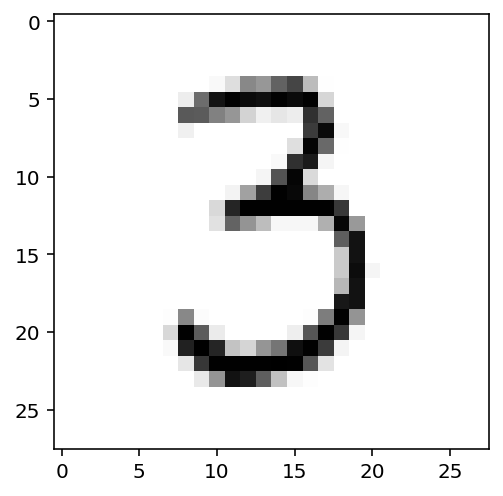

In [14]:
plt.imshow(train_data[50], cmap=cm.Greys)
plt.show()

For the selected training data point, print the corresponding label:

In [15]:
train_labels[50]

3

Print the labels of the first 100 training data points:

In [16]:
train_labels[:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

Print the values of 14th row of the first training data point:

In [17]:
train_data[0][13]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
       241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

Print the values of the 8th column of the first data point:

In [18]:
train_data[0][:][7]

array([  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
       253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
         0,   0], dtype=uint8)

### Normalising the values in the MNIST data set

Find the maximum value in our data set:

In [19]:
train_data.max()

255

Normalise the values of all data sets between 0 and 1:

In [20]:
train_data = train_data / 255
validation_data = validation_data / 255
test_data = test_data / 255

Print the values of 14th row of the first training data point:

In [21]:
train_data[0][13]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.137, 0.945, 0.882, 0.627, 0.424, 0.004,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

### Reshaping the values in the MNIST data set

Print the shape of the first data point in the training set:

In [22]:
train_data[0].shape

(28, 28)

Reshape this data point into a column vector and store it in a variable `dp`:

In [23]:
dp = train_data[0].reshape(28*28,1)
dp

array([[0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [

What is the shape of the vector stored in the variable `dp`:

In [24]:
dp.shape

(784, 1)

Reshape all the data as column vectors:

In [25]:
train_data = np.array([d.reshape(28*28,1) for d in train_data])
validation_data = np.array([d.reshape(28*28,1) for d in validation_data])
test_data = np.array([d.reshape(28*28,1) for d in test_data])

Print the shape of our training data:

In [26]:
train_data.shape

(50000, 784, 1)

## Using our own Neural Network algorithm for classification

### Converting the labels in the MNIST data set

For this purpose we can reuse the function `convert_label` that we defined before:

In [27]:
def convert_label(x):
    vec = np.zeros((10,1))
    vec[x-1] = 1
    return vec

Convert the label of the first data point in the training set:

In [28]:
convert_label(train_labels[0])

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Convert all the label sets:

In [29]:
train_labels_new = np.array([convert_label(l) for l in train_labels])
validation_labels_new = np.array([convert_label(l) for l in validation_labels])
test_labels_new = np.array([convert_label(l) for l in test_labels])

Print the shape of our new training labels:

In [30]:
train_labels_new.shape

(50000, 10, 1)

Apart for two elements, the algorithm we will use here is identical to the algorithms we have been using so far. What differs is:
- When initialising weights, we divide each weight by the square root of the number of activations in the previous layer. This makes weights values smaller for the layer after the input one. This is done because the input layer has 784 activations which would make weights too large.
- We are using mini-batch training. Online training would be too slow, and batch training is not feasible since we have 50.000 data points. To learn step-by-step how we made mini batches, check the notebook named 'Appendix 01 - Mini batch'

To use mini batches, we will zip together data with labels into a set:

In [31]:
train_set = np.array(list(zip(train_data, train_labels_new)))
validation_set = np.array(list(zip(validation_data, validation_labels_new)))
testing_set = np.array(list(zip(test_data, test_labels_new)))

In [32]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def evaluate_accuracy(dset, round_digits):
    dlen = len(dset)
    num_correct = 0;
    for dp, y in dset:
        a = dp
        for W, b in zip(weights, biases):
            a = sigmoid(np.dot(W, a) + b)
        if (np.argmax(y)==np.argmax(a)):
            num_correct += 1
    return np.round(100*(num_correct / dlen),round_digits)

In [33]:
sizes = [784, 100, 10]

num_epochs = 8
step_size = 3
biases = [np.random.randn(a,1) for a in sizes[1:]]
weights = [np.random.randn(nout, nin)/np.sqrt(nin) for nout, nin in zip(sizes[1:], sizes[:-1])]
d_biases = [np.zeros(b.shape) for b in biases]
d_weights = [np.zeros(w.shape) for w in weights]
no_layers = len(sizes)
datalen = len(train_set)
mini_batch_length = 10

for epoch in np.arange(num_epochs):
    TC = 0
    np.random.shuffle(train_set)
    mini_batches = [train_set[a:a+mini_batch_length] 
                    for a in range(0, datalen, mini_batch_length)]
    for batch in mini_batches:
        dd_biases = [np.zeros(b.shape) for b in biases]
        dd_weights = [np.zeros(w.shape) for w in weights]
        # single point (a,y)
        for dp, y in batch:
            a = dp
            activations = [a]
            weighted_sums = []
            for W, b in zip(weights, biases):
                z = np.dot(W, a) + b
                weighted_sums.append(z)
                a = sigmoid(z)
                activations.append(a)
            # cost
            C = np.sum((a-y)**2)
            TC += C
            # backward pass
            dC = 2*(a-y)
            delta = dC * a * (1 - a)
            d_biases[-1] = delta
            d_weights[-1] = np.dot(delta, activations[-2].T)
            for i in range(2, no_layers):
                delta = activations[-i]*(1-activations[-i])*np.dot(weights[-i+1].T,delta)
                d_biases[-i] = delta
                d_weights[-i] = np.dot(delta, activations[-i-1].T)
            dd_weights = [dw+ddw for dw, ddw in zip(d_weights, dd_weights)]
            dd_biases = [db+ddb for db, ddb in zip(d_biases, dd_biases)]
        blen = len(batch)
        weights = [d-dw/blen*step_size for d, dw in zip(weights, dd_weights)]
        biases = [d-db/blen*step_size for d, db in zip(biases, dd_biases)]
    acc_train = evaluate_accuracy(train_set,4)
    acc_validation = evaluate_accuracy(validation_set,4)
    print (f'epoch: {epoch+1} | total cost: {np.round(TC,4)}')
    print (f"Training set prediction accuracy:   {acc_train}%")
    print (f"Validation set prediction accuracy: {acc_validation}%\n")

epoch: 1 | total cost: 22140.1405
Training set prediction accuracy:   94.154%
Validation set prediction accuracy: 94.06%

epoch: 2 | total cost: 4698.5037
Training set prediction accuracy:   95.698%
Validation set prediction accuracy: 95.33%

epoch: 3 | total cost: 3830.5501
Training set prediction accuracy:   96.44%
Validation set prediction accuracy: 95.75%

epoch: 4 | total cost: 3261.6177
Training set prediction accuracy:   96.538%
Validation set prediction accuracy: 95.78%

epoch: 5 | total cost: 2980.1646
Training set prediction accuracy:   97.13%
Validation set prediction accuracy: 96.02%

epoch: 6 | total cost: 2687.584
Training set prediction accuracy:   97.46%
Validation set prediction accuracy: 96.24%

epoch: 7 | total cost: 2472.1176
Training set prediction accuracy:   97.636%
Validation set prediction accuracy: 96.65%

epoch: 8 | total cost: 2322.4483
Training set prediction accuracy:   97.66%
Validation set prediction accuracy: 96.23%



In [34]:
acc_test = evaluate_accuracy(testing_set, 4)
print (f"Testing set prediction accuracy: {acc_test}%")

Testing set prediction accuracy: 96.58%


## Using Tensorflow Keras for classification

### Recreating our own model in Tensorflow Keras

In [35]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(784,1)),
  tf.keras.layers.Dense(100, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='sigmoid')
])

In [36]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 3.0),
              loss='mse',
              metrics=['accuracy'])

history = model.fit(train_data, 
                    train_labels_new, 
                    validation_data=(validation_data,validation_labels_new), 
                    epochs=8)

Train on 50000 samples, validate on 10000 samples
Epoch 1/8
50000/50000 [==============================] - 6s 113us/sample - loss: 0.0311 - accuracy: 0.8341 - val_loss: 0.0178 - val_accuracy: 0.9060
Epoch 2/8
50000/50000 [==============================] - 5s 92us/sample - loss: 0.0168 - accuracy: 0.9062 - val_loss: 0.0141 - val_accuracy: 0.9200
Epoch 3/8
50000/50000 [==============================] - 5s 94us/sample - loss: 0.0141 - accuracy: 0.9206 - val_loss: 0.0123 - val_accuracy: 0.9289
Epoch 4/8
50000/50000 [==============================] - 5s 95us/sample - loss: 0.0125 - accuracy: 0.9292 - val_loss: 0.0111 - val_accuracy: 0.9355
Epoch 5/8
50000/50000 [==============================] - 5s 95us/sample - loss: 0.0113 - accuracy: 0.9359 - val_loss: 0.0102 - val_accuracy: 0.9404
Epoch 6/8
50000/50000 [==============================] - 5s 95us/sample - loss: 0.0103 - accuracy: 0.9408 - val_loss: 0.0096 - val_accuracy: 0.9445
Epoch 7/8
50000/50000 [==============================] - 5s 9

In [37]:
model.evaluate(test_data, test_labels_new, verbose=2)

10000/1 - 0s - loss: 0.0044 - accuracy: 0.9558


[0.00819785578874871, 0.9558]

### Using the recommended Tensorflow Keras parameters 

In [38]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(784,1)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data, 
                    train_labels, 
                    validation_data=(validation_data, validation_labels),
                    epochs=8)

Train on 50000 samples, validate on 10000 samples
Epoch 1/8
50000/50000 [==============================] - 7s 143us/sample - loss: 0.3222 - accuracy: 0.9077 - val_loss: 0.1518 - val_accuracy: 0.9552
Epoch 2/8
50000/50000 [==============================] - 6s 129us/sample - loss: 0.1587 - accuracy: 0.9523 - val_loss: 0.1080 - val_accuracy: 0.9677
Epoch 3/8
50000/50000 [==============================] - 6s 126us/sample - loss: 0.1201 - accuracy: 0.9641 - val_loss: 0.0907 - val_accuracy: 0.9726
Epoch 4/8
50000/50000 [==============================] - 6s 128us/sample - loss: 0.0948 - accuracy: 0.9709 - val_loss: 0.0810 - val_accuracy: 0.9744
Epoch 5/8
50000/50000 [==============================] - 7s 131us/sample - loss: 0.0812 - accuracy: 0.9746 - val_loss: 0.0779 - val_accuracy: 0.9750
Epoch 6/8
50000/50000 [==============================] - 7s 135us/sample - loss: 0.0708 - accuracy: 0.9776 - val_loss: 0.0783 - val_accuracy: 0.9760
Epoch 7/8
50000/50000 [==============================] -

In [40]:
model.evaluate(test_data, test_labels, verbose=2)

10000/1 - 0s - loss: 0.0398 - accuracy: 0.9772


[0.07854250898621977, 0.9772]